# Hyper Parameter Optimization (HPO) Result Analysis-2

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import random as rd
from random import choices
import numpy as np
#import seaborn as sns
import plotly.graph_objects as go

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
tuning = pd.read_csv('Tuning_data2.csv')

In [3]:
tuning_1 = tuning.drop(['Unnamed: 0','TrainingElapsedTimeSeconds','TrainingEndTime' ,'TrainingJobStatus','TrainingStartTime','hidden_layers',
                         'hidden_units','input_units','epochs'], 1)

In [4]:
batch_size = tuning.groupby("batch_size")['FinalObjectiveValue'].describe()
dropout = tuning.groupby("dropout")['FinalObjectiveValue'].describe()
learning_rate = tuning.groupby("learning_rate")['FinalObjectiveValue'].describe()
seq_length = tuning.groupby("seq_length")['FinalObjectiveValue'].describe()

In [5]:
mean_batch_size = batch_size.iloc[: , 1].values
min_batch_size = batch_size.iloc[: , 3].values
max_batch_size = batch_size.iloc[: , 7].values

mean_dropout = dropout.iloc[: , 1].values
min_dropout = dropout.iloc[: , 3].values
max_dropout = dropout.iloc[: , 7].values

mean_learning_rate = learning_rate.iloc[: , 1].values
min_learning_rate = learning_rate.iloc[: , 3].values
max_learning_rate = learning_rate.iloc[: , 7].values

mean_seq_length = seq_length.iloc[: , 1].values
min_seq_length = seq_length.iloc[: , 3].values
max_seq_length = seq_length.iloc[: , 7].values

In [6]:
index = np.array(range(1,129))

In [7]:
optimizer = np.array(tuning)

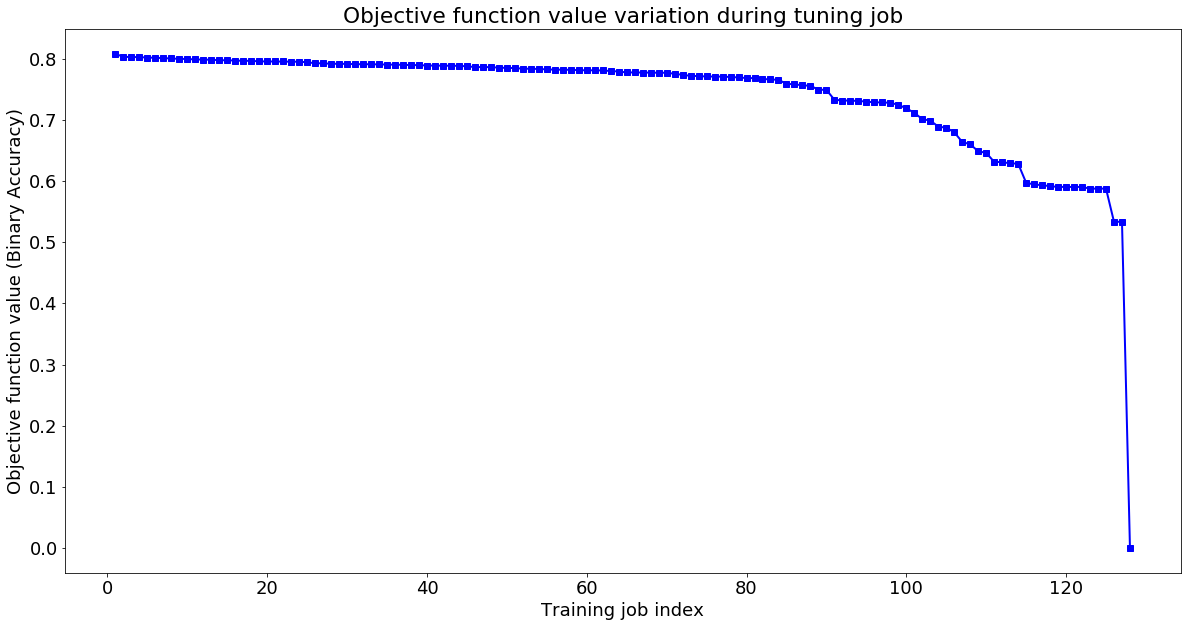

In [8]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.plot(index, optimizer[:,1], 's-',lw = 2,c='blue')
#df = pd.DataFrame({'x':index, 'y':optimizer[:,1]})
# a=sns.stripplot(index, optimizer[:,1])
# a.set(xlim=(0,120))
#plt.plot('x','y',data=df, linestyle='-', marker='o')
plt.title('Objective function value variation during tuning job')
plt.ylabel('Objective function value (Binary Accuracy)')
plt.xlabel('Training job index')
plt.show()

In [9]:
X = np.unique(optimizer[:,7])
X = X.reshape(-1,1)
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, mean_batch_size)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, mean_batch_size)
X_grid = np.arange(min(X), max(X)+1, 1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid = X_grid.astype('float')

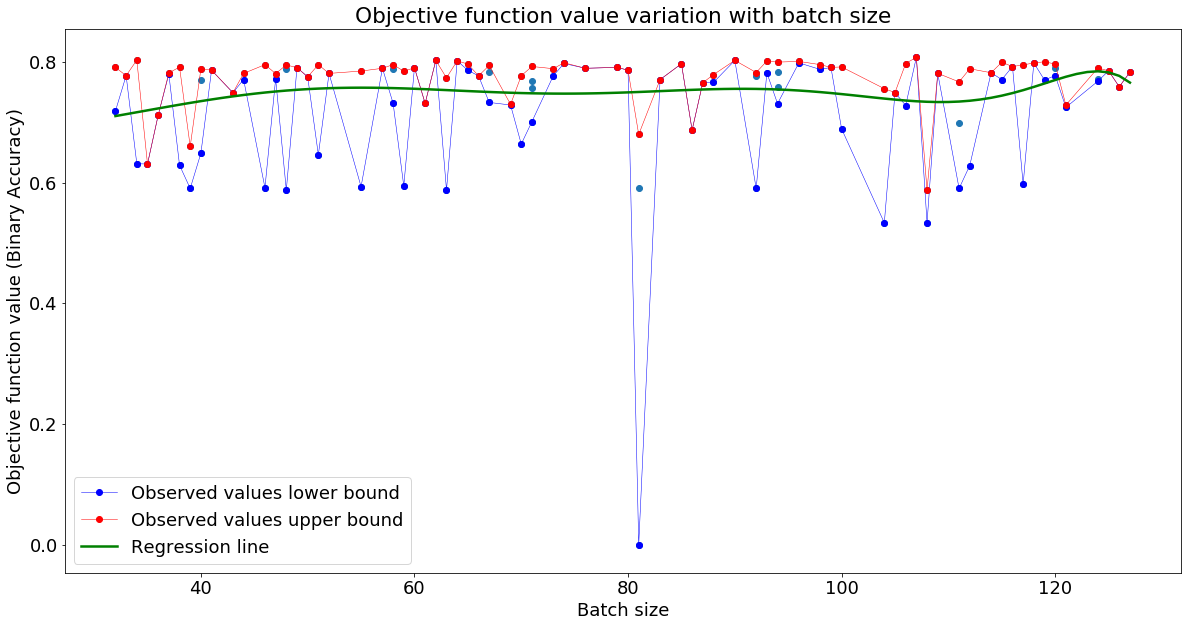

[ 32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101.
 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.]
[0.71059636 0.7137334  0.71690163 0.72007925 0.72324404 0.7263737
 0.72944613 0.73243971 0.73533359 0.738108   0.74074443 0.74322597
 0.74553746 0.74766572 0.74959972 0.75133071 0.75285236 0.7541608
 0.7552547  0.75613529 0.75680632 0.75727399 0.75754693 0.75763598
 0.75755412 0.75731625 0.75693898 0.7564404  0.75583979 0.75515739
 0.75441404 0.75363092 0.75282916 0.75202958 0.75125231 0.7505165
 0.74983995 0.74923882 0.74872738 0.74831765 0.74801926 0.74783915
 0.74778142 0.74784724 0.74803466 0.74833867 0

In [10]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.scatter(optimizer[:,7], optimizer[:,1])
plt.plot(np.unique(optimizer[:,7]),min_batch_size,'o-',lw=0.5,c='blue')
plt.plot(np.unique(optimizer[:,7]),max_batch_size,'o-',lw=0.5,c='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green',lw=2.5)
plt.title('Objective function value variation with batch size')
plt.ylabel('Objective function value (Binary Accuracy)')
plt.xlabel('Batch size')
plt.legend(['Observed values lower bound','Observed values upper bound','Regression line'], loc='lower left')
plt.show()
print(X_grid[:,0])
print(lin_reg_2.predict(poly_reg.fit_transform(X_grid)))
print(np.unique(optimizer[:,7]))

In [11]:
X = np.unique(optimizer[:,8])
X = X.reshape(-1,1)
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, mean_dropout)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, mean_dropout)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

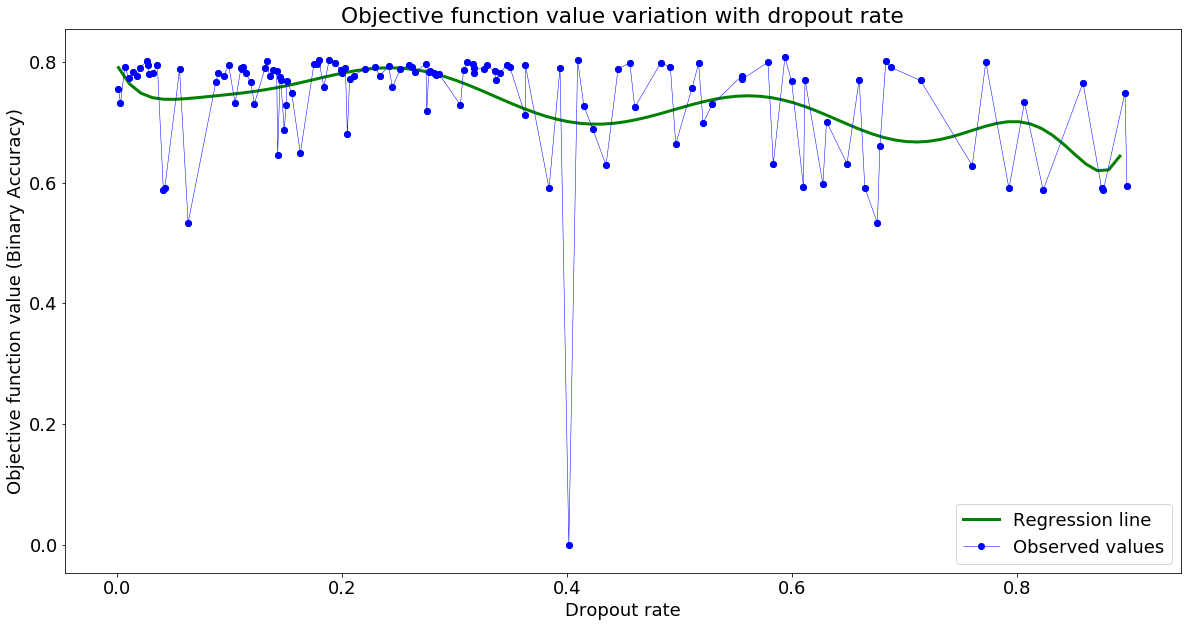

In [12]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.scatter(optimizer[:,8], optimizer[:,1])
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green',lw=3)
plt.plot(np.unique(optimizer[:,8]),mean_dropout,'o-',lw=0.5,c='blue')
plt.title('Objective function value variation with dropout rate')
plt.ylabel('Objective function value (Binary Accuracy)')
plt.xlabel('Dropout rate')
plt.legend(['Regression line','Observed values'], loc='lower right')
plt.show()

In [13]:
X = np.unique(optimizer[:,16])
X = X.reshape(-1,1)
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, mean_seq_length)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, mean_seq_length)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

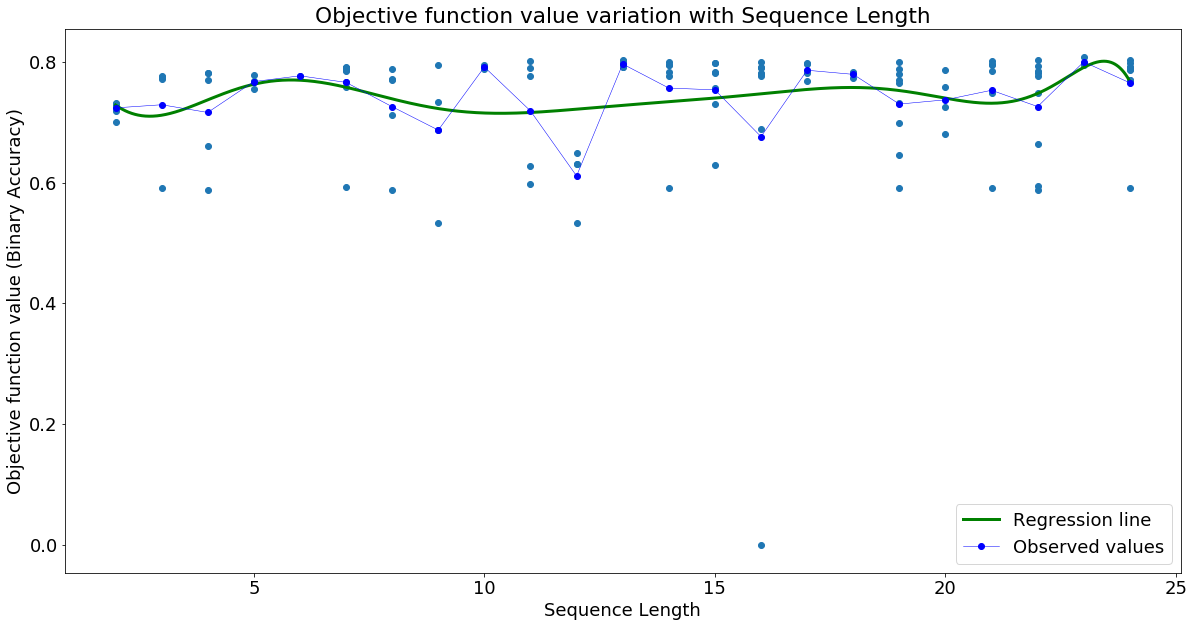

In [14]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.scatter(optimizer[:,16], optimizer[:,1])
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green',lw=3)
plt.plot(np.unique(optimizer[:,16]),mean_seq_length,'o-',lw=0.5,c='blue')

plt.title('Objective function value variation with Sequence Length')
plt.ylabel('Objective function value (Binary Accuracy)')
plt.xlabel('Sequence Length')
plt.legend(['Regression line','Observed values'], loc='lower right')
plt.show()

In [15]:
X = np.unique(optimizer[:,13])
X = X.reshape(-1,1)
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, mean_learning_rate)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, mean_learning_rate)
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))

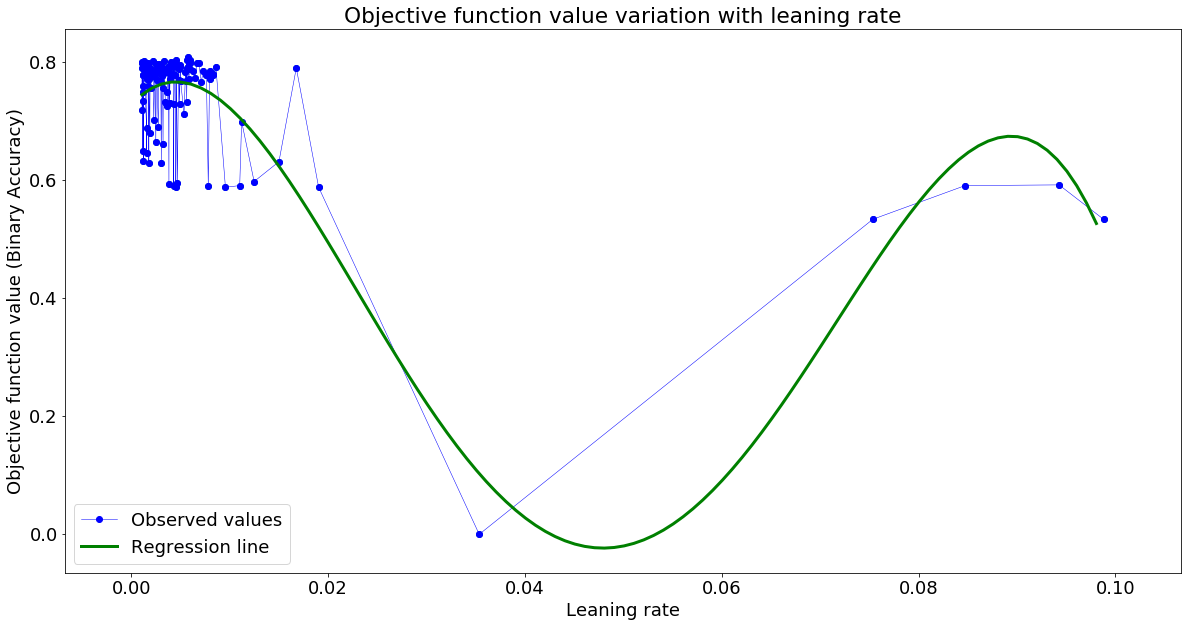

In [16]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.scatter(optimizer[:,13], optimizer[:,1])
plt.plot(np.unique(optimizer[:,13]),min_learning_rate,'o-',lw=0.5,c='blue')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green',lw=3)
plt.title('Objective function value variation with leaning rate')
plt.ylabel('Objective function value (Binary Accuracy)')
plt.xlabel('Leaning rate')
plt.legend(['Observed values','Regression line'], loc='lower left')
plt.show()